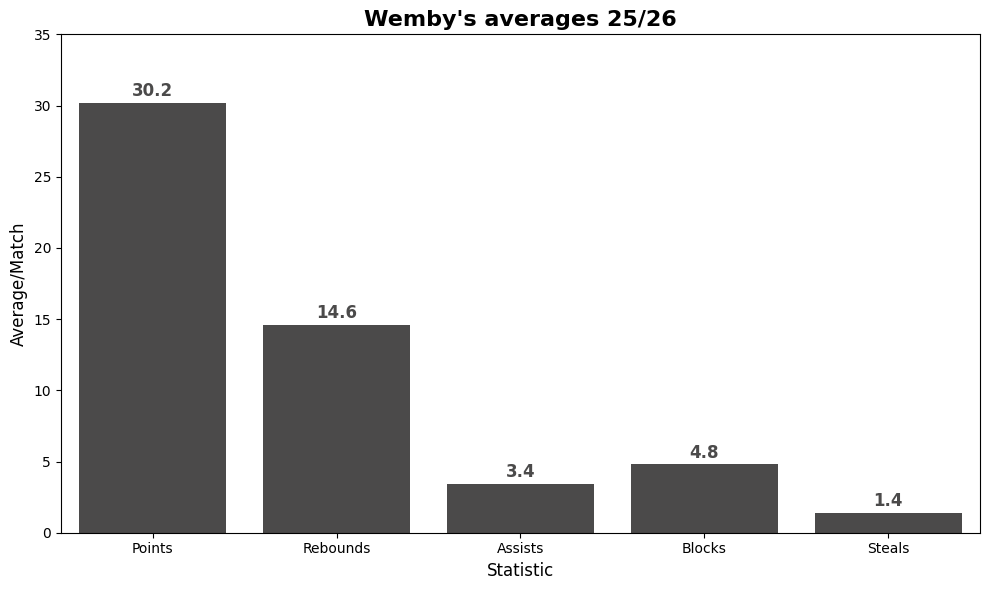

In [6]:
#5 main statistics categories averages graph
visible_stats_averages = average[['Points', 'Rebounds', 'Assists', 'Blocks', 'Steals']].round(2)

df_averages = visible_stats_averages.reset_index()
df_averages.columns = ['Stat', 'Val']

plt.figure(figsize=(10, 6))

sns.barplot(x='Stat', y='Val', data=df_averages, color='#4B4A4A')

for index, row in df_averages.iterrows():
    plt.text(index, row['Val'] + 0.2, f"{row['Val']}", 
             color='#4B4A4A', ha="center", va='bottom', fontsize=12, weight='bold')

plt.title("Wemby's averages 25/26", fontsize=16, weight='bold')
plt.xlabel('Statistic', fontsize=12)
plt.ylabel('Average/Match', fontsize=12)
plt.ylim(0, 35)

plt.tight_layout()
plt.show()

In [5]:
columns_stats = ['Points', 'Rebounds', 'Assists', 'Blocks', 'Steals', 'Minutes'] 

average = df[columns_stats].mean()

# --- PERFORMANCE DETECTION ---

# "5x5" means that Wemby got at least 5 in all 5 main statistic categories

df['5x5'] = ( (df['Points'] >= 5) & 
              (df['Rebounds'] >= 5) & 
              (df['Assists'] >= 5) & 
              (df['Blocks'] >= 5) &
              (df['Steals'] >= 5) 
            ).astype(int)

#"Double Double" means that Wemby got at least 10 in 2 of the 5 main statistic categories

df['Double_Double'] = (
    ((df['Points'] >= 10) & (df['Rebounds'] >= 10)) |
    ((df['Points'] >= 10) & (df['Assists'] >= 10)) |
    ((df['Points'] >= 10) & (df['Blocks'] >= 10)) |
    ((df['Points'] >= 10) & (df['Steals'] >= 10)) |
    ((df['Rebounds'] >= 10) & (df['Assists'] >= 10)) |
    ((df['Rebounds'] >= 10) & (df['Blocks'] >= 10)) |
    ((df['Rebounds'] >= 10) & (df['Steals'] >= 10)) |
    ((df['Assists'] >= 10) & (df['Blocks'] >= 10)) |
    ((df['Assists'] >= 10) & (df['Steals'] >= 10)) |
    ((df['Blocks'] >= 10) & (df['Steals'] >= 10)) 
).astype(int)

conditions_td = [
    df['Points'] >= 10, 
    df['Rebounds'] >= 10, 
    df['Assists'] >= 10, 
    df['Blocks'] >= 10, 
    df['Steals'] >= 10
]
tens_count = sum(conditions_td)

#"Triple Double" means that Wemby got at least 10 in 3 of the 5 main statistic categories

df['Triple_Double'] = (tens_count >= 3).astype(int)

print("** Average statistics **")
print(average.round(2))
print("-" * 55)
print(f"Triple Doubles : {df['Triple_Double'].sum()}")
print(f"Double Doubles : {df['Double_Double'].sum()}")
print(f"5x5s : {df['5x5'].sum()}")

** Average statistics **
Points      30.2
Rebounds    14.6
Assists      3.4
Blocks       4.8
Steals       1.4
Minutes     33.8
dtype: float64
-------------------------------------------------------
Triple Doubles : 0
Double Doubles : 5
5x5s : 0


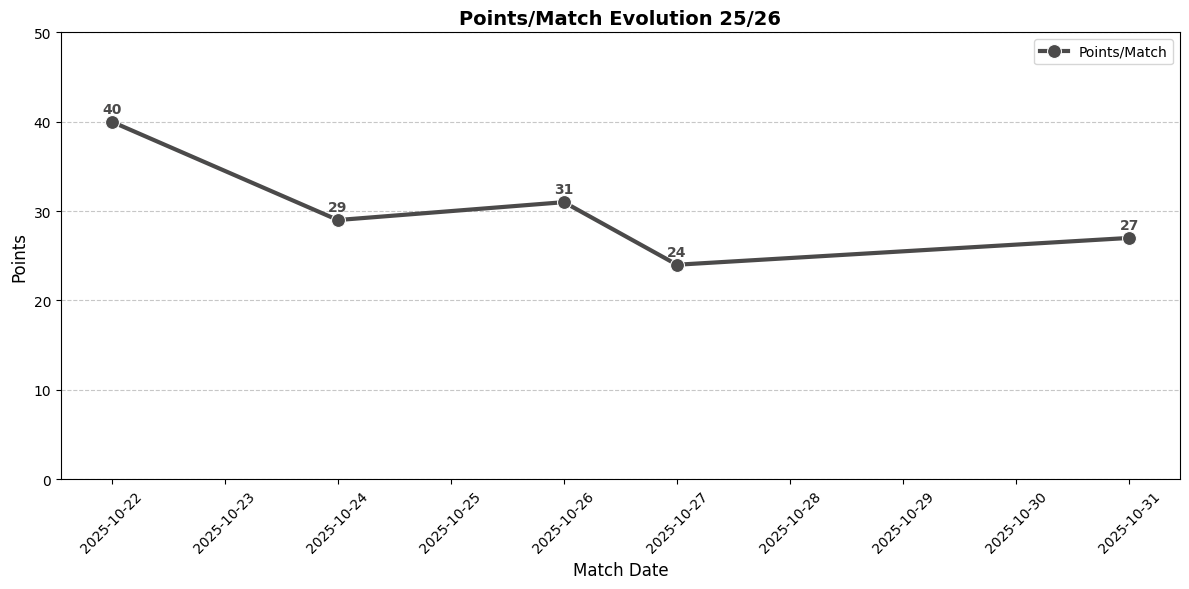

In [4]:
#Points per Matches evolution graph
plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='Points', data=df, marker='o', 
             label='Points/Match', color='#4B4A4A', linewidth=3, markersize=10)

plt.ylim(0, 50)

for i in range(len(df)):
    plt.text(df['Date'][i], df['Points'][i] + 1, f"{df['Points'][i]}", 
             ha='center', fontsize=10, color="#4B4A4A", weight='bold')

plt.title('Points/Match Evolution 25/26', fontsize=14, weight='bold')
plt.xlabel('Match Date', fontsize=12)
plt.ylabel('Points', fontsize=12)

plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
df = pd.read_csv('wemby_25_26.csv')

df['Date'] = pd.to_datetime(df['Date']) 

colonnes_stats = ['Points', 'Rebounds', 'Assists', 'Blocks', 'Steals', 'Minutes']

for col in colonnes_stats:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

print("Cleaned DataFrame :")
print(df.head())

Cleaned DataFrame :
        Date Opponent Win/Lose  Points  Rebounds  Assists  Blocks  Steals  \
0 2025-10-22      DAL        W      40        15        1       3       1   
1 2025-10-24      NOP        W      29        11        2       9       1   
2 2025-10-26      BKN        W      31        14        4       6       3   
3 2025-10-27      TOR        W      24        15        4       1       1   
4 2025-10-31      MIA        W      27        18        6       5       1   

   Minutes  
0       30  
1       32  
2       36  
3       31  
4       40  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns